# Model Evaluation

In [2]:
from importlib import reload
import util
import ModelSeries as ms
import eval

de = util.DataExtractor()
gt_df = de.croppedData()
records = ms.EvalRecord(gt_df, "runpod_oneshot_training2", r"C:\Users\alexh\Desktop\ComputerVision\Hausarbeit\obb_anns_hausarbeit\models\60@60@2@720\runpod_oneshot_training2\runpod_oneshot_training2_eval.json")

Saving to: c:\Users\alexh\Desktop\ComputerVision\Hausarbeit\obb_anns_hausarbeit\ds2_dense\ds2_dense\gt_space.json


In [3]:
import json, os
import pandas as pd
filepath = os.path.join(os.getcwd(), "models", "60@60@2@720", "runpod_oneshot_training2", "runpod_oneshot_training2_eval.json")

with open(filepath, "r") as file:
    data = json.load(file)
print(f"len(data): {len(data)}")
print(f"len(data[eval_records]: {len(data['eval_records'])}")
df = pd.DataFrame(data["eval_records"])

len(data): 1
len(data[eval_records]: 40664


number of images: 1362
number of annotations: 875337
avg number of annotations per image: 642.6850220264317
number of classes: 114


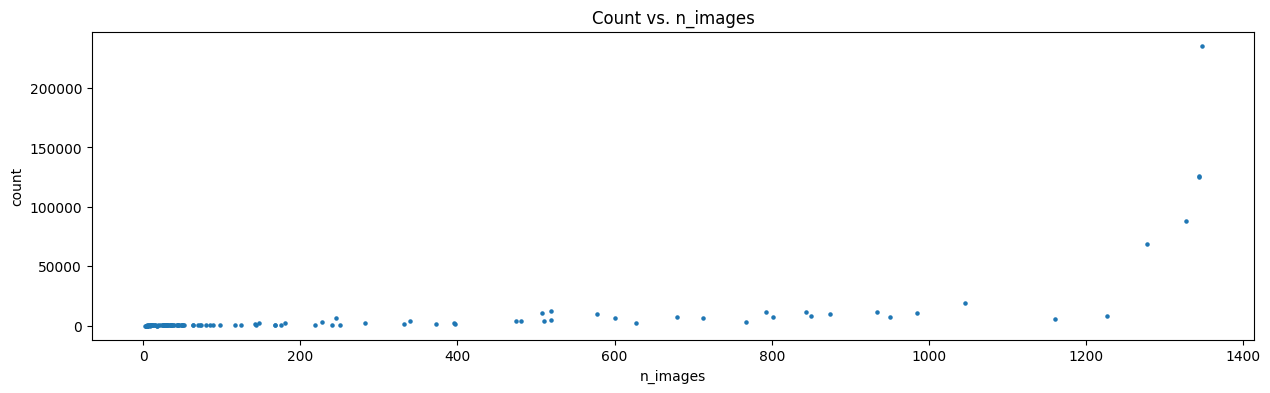

In [4]:
classes = eval.classReport(gt_df)

In [5]:
classes.head()

,class_id,count,name,n_images,%_images
0,41,235695,stem,1347,98.898678
1,24,125497,noteheadBlackOnLine,1344,98.678414
2,26,125410,noteheadBlackInSpace,1344,98.678414
3,1,88316,ledgerLine,1327,97.430250
4,121,69016,beam,1277,93.759178


In [6]:
df.head()

,class_id,class_name,n_occurences,n_images,epoch,mAP,mREC
0,0,brace,2879,767,0,0.0,0.0
1,1,ledgerLine,88316,1327,0,0.0,0.0
2,2,repeatDot,2786,227,0,0.0,0.0
3,3,segno,231,168,0,0.0,0.0
4,4,coda,225,219,0,0.0,0.0


In [7]:
classes = classes.merge(df[df["epoch"] == 100][["class_id", "epoch", "mAP", "mREC"]], on="class_id", how="inner")

In [8]:
import matplotlib.pyplot as plt
import json
def classReport(gt_df):
    
    n_imgs = len(gt_df["img_id"].unique())
    #crude statistics
    print(f"number of images: {n_imgs}")
    print(f"number of annotations: {len(gt_df)}")
    print(f"avg number of annotations per image: {len(gt_df) / n_imgs}")
    print(f"number of classes: {len(gt_df["class_id"].unique())}")

    n_imgs = gt_df["img_id"].nunique()

    # counts per class (rename column!)
    counts = (
        gt_df.groupby("class_id")["img_id"]
            .nunique()
            .reset_index(name="n_images")
    )

    # base table
    classes = (
        gt_df["class_id"].value_counts()
        .reset_index(name="count")
        .rename(columns={"index": "class_id"})
    )

    # add names from JSON
    filepath = os.path.join(os.getcwd(), "ds2_dense", "ds2_dense", "class_names.json")
    with open(filepath, "r") as file:
        class_names = json.load(file)
    class_names = {int(k): str(v) for k, v in class_names.items()}

    classes["name"] = classes["class_id"].map(class_names)


    # merge once, then compute %
    classes = classes.merge(counts, on="class_id", how="inner")
    classes["%_images"] = classes["n_images"] * 100 / n_imgs

    filepath = os.path.join(os.getcwd(), "models", "60@60@2@720", "runpod_oneshot_training2", "runpod_oneshot_training2_eval.json")

    with open(filepath, "r") as file:
        data = json.load(file)
    df = pd.DataFrame(data["eval_records"])

    classes = classes.merge(df[df["epoch"] == 100][["class_id", "epoch", "mAP", "mREC"]], on="class_id", how="inner")



    n_images = classes["n_images"].tolist()
    counts   = classes["count"].tolist() 
    plt.figure(figsize = (15, 4))
    plt.scatter(n_images, counts, s = 5)

    plt.xlabel("n_images")
    plt.ylabel("count")
    plt.title("Count vs. n_images")
    plt.show()
    return classes

number of images: 1362
number of annotations: 875337
avg number of annotations per image: 642.6850220264317
number of classes: 114


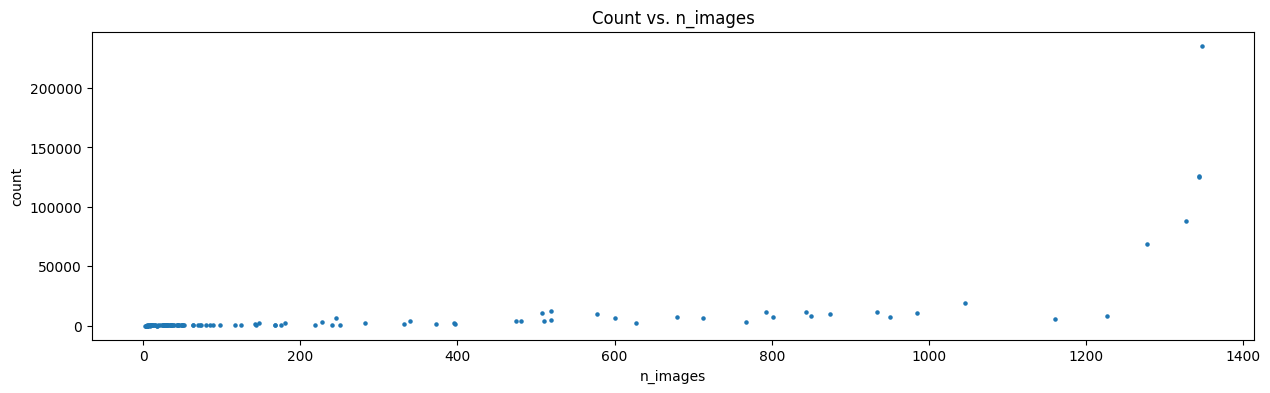

In [9]:
classes = classReport(gt_df)

In [10]:
out = pd.concat([classes.iloc[0:6], classes.iloc[7:8], classes.iloc[14:15], classes.iloc[[28]]])
out.head(9)

,class_id,count,name,n_images,%_images,epoch,mAP,mREC
0,41,235695,stem,1347,98.898678,100,0.057569,0.047023
1,24,125497,noteheadBlackOnLine,1344,98.678414,100,0.442213,0.308992
2,26,125410,noteheadBlackInSpace,1344,98.678414,100,0.521332,0.369398
3,1,88316,ledgerLine,1327,97.430250,100,0.076485,0.062510
4,121,69016,beam,1277,93.759178,100,0.258973,0.252675
5,40,18723,augmentationDot,1046,76.798825,100,0.094079,0.077131
7,30,11297,noteheadHalfInSpace,934,68.575624,100,0.351981,0.256367
14,5,8332,clefG,1227,90.088106,100,0.831081,0.985577
28,0,2879,brace,767,56.314244,100,0.781116,0.910000


In [19]:
find10 = classes.sort_values("class_id")
find10.head(11)

,class_id,count,name,n_images,%_images,epoch,mAP,mREC
28,0,2879,brace,767,56.314244,100,0.781116,0.910000
3,1,88316,ledgerLine,1327,97.430250,100,0.076485,0.062510
29,2,2786,repeatDot,227,16.666667,100,0.027273,0.023810
72,3,231,segno,168,12.334802,100,0.447368,0.850000
74,4,225,coda,219,16.079295,100,0.750000,1.000000
14,5,8332,clefG,1227,90.088106,100,0.831081,0.985577
38,6,1015,clefCAlto,373,27.386197,100,0.600000,0.789474
49,7,614,clefCTenor,240,17.621145,100,0.363636,0.500000
22,8,5405,clefF,1160,85.168869,100,0.774272,0.898592
37,10,1101,clef8,397,29.148311,100,0.448276,0.433333
